# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Analysis
1) The temperature plot illustrates that cities near a latitude of 0 degrees have higher temperatures.

2) Windspeeds appear to be lower in cities in latitudes between 0 and 20 degrees.

3) Humidity tends to be high in cities in latitudes between -10 and 20 degrees.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pandas.io.json import json_normalize

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# JSON dependency
import json

# Path to base URL for API calls
base_URL = 'https://api.openweathermap.org/data/2.5/weather?q='

# Create list to store requested data
response = []

# Run successive API calls from first to final cities[1:-1]

for x in range(len(cities)):
    
    call = requests.get(base_URL + str(cities[x]) + "&APPID=" + api_key).json()
    
    #Exception handling for cities not recognized by weather API
    try:
        print(f"Requesting info for ID {call['id']}: {call['name']}...")
        response.append(call)
    except KeyError:
        pass

Requesting info for ID 934322: Mahebourg...
Requesting info for ID 2126710: Beringovskiy...
Requesting info for ID 5486795: Raton...
Requesting info for ID 5104774: Somerville...
Requesting info for ID 3874787: Punta Arenas...
Requesting info for ID 2015306: Tiksi...
Requesting info for ID 3693468: Pomabamba...
Requesting info for ID 4407665: Kodiak...
Requesting info for ID 4732862: Nome...
Requesting info for ID 2189343: Kaeo...
Requesting info for ID 2995603: Saint-Pierre...
Requesting info for ID 4021858: Guerrero Negro...
Requesting info for ID 3860443: Comodoro Rivadavia...
Requesting info for ID 5848280: Kapaa...
Requesting info for ID 1015776: Bredasdorp...
Requesting info for ID 3652764: Puerto Ayora...
Requesting info for ID 2027244: Bagdarin...
Requesting info for ID 1526038: Atbasar...
Requesting info for ID 2110227: Butaritari...
Requesting info for ID 3893629: Coquimbo...
Requesting info for ID 2737599: Saldanha...
Requesting info for ID 5012495: Traverse City...
Requesti

Requesting info for ID 2126123: Chokurdakh...
Requesting info for ID 2161376: Kingaroy...
Requesting info for ID 1726279: Sabang...
Requesting info for ID 2312888: Mbanza-Ngungu...
Requesting info for ID 4335045: Algiers...
Requesting info for ID 2185763: Okato...
Requesting info for ID 5378870: Oildale...
Requesting info for ID 1784592: Wufeng...
Requesting info for ID 3369174: Calvinia...
Requesting info for ID 2178753: Kirakira...
Requesting info for ID 1486910: Komsomolskiy...
Requesting info for ID 1650434: Bambanglipuro...
Requesting info for ID 3471451: Arraial do Cabo...
Requesting info for ID 1516589: Zhezkazgan...
Requesting info for ID 866062: Iskateley...
Requesting info for ID 2013465: Verkhoyansk...
Requesting info for ID 546105: Nikolskoye...
Requesting info for ID 6096551: Pangnirtung...
Requesting info for ID 4944903: Nantucket...
Requesting info for ID 3382226: Camopi...
Requesting info for ID 576093: Blagoyevo...
Requesting info for ID 3443061: Chuy...
Requesting inf

Requesting info for ID 5954718: Flin Flon...
Requesting info for ID 3667868: Solano...
Requesting info for ID 1641899: Labuhan...
Requesting info for ID 1265954: Kotra...
Requesting info for ID 2656067: Broome...
Requesting info for ID 1501377: Kungurtug...
Requesting info for ID 5905393: Bonavista...
Requesting info for ID 1862034: Ibara...
Requesting info for ID 2063039: Port Keats...
Requesting info for ID 2561668: Agadir...
Requesting info for ID 4315535: Bastrop...
Requesting info for ID 1538641: Kedrovyy...
Requesting info for ID 2068655: Katherine...
Requesting info for ID 149050: Uvinza...
Requesting info for ID 3353715: Outjo...
Requesting info for ID 3471859: Aracatuba...
Requesting info for ID 107304: Buraydah...
Requesting info for ID 3992842: Petatlan...
Requesting info for ID 2733851: Soure...
Requesting info for ID 6185217: Yarmouth...
Requesting info for ID 1580240: Hue...
Requesting info for ID 2135517: Norsup...
Requesting info for ID 2139521: Noumea...
Requesting inf

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create dataframe based on the API responses
df = pd.DataFrame(response)
df.head()

,base,clouds,cod,coord,dt,id,main,name,rain,snow,sys,timezone,visibility,weather,wind
0,stations,{'all': 40},200,"{'lon': 57.7, 'lat': -20.41}",1572928857,934322,"{'temp': 299.21, 'pressure': 1020, 'humidity':...",Mahebourg,NaN,NaN,"{'type': 1, 'id': 2061, 'country': 'MU', 'sunr...",14400,10000.0,"[{'id': 802, 'main': 'Clouds', 'description': ...","{'speed': 5.1, 'deg': 80}"
1,model,{'all': 1},200,"{'lon': 179.32, 'lat': 63.05}",1572928858,2126710,"{'temp': 272.65, 'pressure': 1028, 'humidity':...",Beringovskiy,NaN,NaN,"{'country': 'RU', 'sunrise': 1572896934, 'suns...",43200,NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 0.65, 'deg': 31}"
2,stations,{'all': 1},200,"{'lon': -104.44, 'lat': 36.9}",1572928858,5486795,"{'temp': 275.06, 'pressure': 1022, 'humidity':...",Raton,NaN,NaN,"{'type': 1, 'id': 5718, 'country': 'US', 'sunr...",-25200,16093.0,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 2.6, 'deg': 270}"
3,stations,{'all': 1},200,"{'lon': -74.61, 'lat': 40.57}",1572928859,5104774,"{'temp': 280.42, 'pressure': 1025, 'humidity':...",Somerville,NaN,NaN,"{'type': 1, 'id': 4940, 'country': 'US', 'sunr...",-18000,16093.0,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 1.8, 'deg': 195}"
4,stations,{'all': 90},200,"{'lon': -70.91, 'lat': -53.16}",1572928860,3874787,"{'temp': 278.15, 'pressure': 981, 'humidity': ...",Punta Arenas,NaN,NaN,"{'type': 1, 'id': 8487, 'country': 'CL', 'sunr...",-10800,10000.0,"[{'id': 520, 'main': 'Rain', 'description': 'l...","{'speed': 11.8, 'deg': 270}"


In [5]:
response

[{'coord': {'lon': 57.7, 'lat': -20.41},
  'weather': [{'id': 802,
    'main': 'Clouds',
    'description': 'scattered clouds',
    'icon': '03d'}],
  'base': 'stations',
  'main': {'temp': 299.21,
   'pressure': 1020,
   'humidity': 74,
   'temp_min': 299.15,
   'temp_max': 299.26},
  'visibility': 10000,
  'wind': {'speed': 5.1, 'deg': 80},
  'clouds': {'all': 40},
  'dt': 1572928857,
  'sys': {'type': 1,
   'id': 2061,
   'country': 'MU',
   'sunrise': 1572917118,
   'sunset': 1572963613},
  'timezone': 14400,
  'id': 934322,
  'name': 'Mahebourg',
  'cod': 200},
 {'coord': {'lon': 179.32, 'lat': 63.05},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01n'}],
  'base': 'model',
  'main': {'temp': 272.65,
   'pressure': 1028,
   'humidity': 86,
   'temp_min': 272.65,
   'temp_max': 272.65,
   'sea_level': 1028,
   'grnd_level': 1027},
  'wind': {'speed': 0.65, 'deg': 31},
  'clouds': {'all': 1},
  'dt': 1572928858,
  'sys': {'country': 'RU'

In [6]:
# Normalize weather data so columns with dictionary values are flattened.
normalized_df = json_normalize(response)

# Create new df that only displays necessary columns for analysis.
## Sys column not showing, need to show country
clean_df = normalized_df.filter(items=['coord.lat', 'coord.lon', 'main.temp_max','main.humidity', 'weather', 'wind.speed', 'sys', 'name'])
clean_df.head()

,coord.lat,coord.lon,main.temp_max,main.humidity,weather,wind.speed,name
0,-20.41,57.70,299.26,74,"[{'id': 802, 'main': 'Clouds', 'description': ...",5.10,Mahebourg
1,63.05,179.32,272.65,86,"[{'id': 800, 'main': 'Clear', 'description': '...",0.65,Beringovskiy
2,36.90,-104.44,276.15,51,"[{'id': 800, 'main': 'Clear', 'description': '...",2.60,Raton
3,40.57,-74.61,285.37,93,"[{'id': 800, 'main': 'Clear', 'description': '...",1.80,Somerville
4,-53.16,-70.91,278.15,80,"[{'id': 520, 'main': 'Rain', 'description': 'l...",11.80,Punta Arenas


In [7]:
clean_df.head()

,coord.lat,coord.lon,main.temp_max,main.humidity,weather,wind.speed,name
0,-20.41,57.70,299.26,74,"[{'id': 802, 'main': 'Clouds', 'description': ...",5.10,Mahebourg
1,63.05,179.32,272.65,86,"[{'id': 800, 'main': 'Clear', 'description': '...",0.65,Beringovskiy
2,36.90,-104.44,276.15,51,"[{'id': 800, 'main': 'Clear', 'description': '...",2.60,Raton
3,40.57,-74.61,285.37,93,"[{'id': 800, 'main': 'Clear', 'description': '...",1.80,Somerville
4,-53.16,-70.91,278.15,80,"[{'id': 520, 'main': 'Rain', 'description': 'l...",11.80,Punta Arenas


In [8]:
split_weather = json_normalize(response, ['weather'])

In [9]:
split_weather.head()

,description,icon,id,main
0,scattered clouds,03d,802,Clouds
1,clear sky,01n,800,Clear
2,clear sky,01n,800,Clear
3,clear sky,01n,800,Clear
4,light intensity shower rain,09n,520,Rain


In [10]:
clean_df['main'] = split_weather['main']
clean_df['main_id'] = split_weather['id']
clean_df.head(20)

,coord.lat,coord.lon,main.temp_max,main.humidity,weather,wind.speed,name,main,main_id
0,-20.41,57.70,299.26,74,"[{'id': 802, 'main': 'Clouds', 'description': ...",5.10,Mahebourg,Clouds,802
1,63.05,179.32,272.65,86,"[{'id': 800, 'main': 'Clear', 'description': '...",0.65,Beringovskiy,Clear,800
2,36.90,-104.44,276.15,51,"[{'id': 800, 'main': 'Clear', 'description': '...",2.60,Raton,Clear,800
3,40.57,-74.61,285.37,93,"[{'id': 800, 'main': 'Clear', 'description': '...",1.80,Somerville,Clear,800
4,-53.16,-70.91,278.15,80,"[{'id': 520, 'main': 'Rain', 'description': 'l...",11.80,Punta Arenas,Rain,520
5,71.64,128.87,248.65,94,"[{'id': 803, 'main': 'Clouds', 'description': ...",1.27,Tiksi,Clouds,803
6,-8.82,-77.46,278.32,97,"[{'id': 500, 'main': 'Rain', 'description': 'l...",1.64,Pomabamba,Rain,500
7,39.95,-94.76,279.82,63,"[{'id': 804, 'main': 'Clouds', 'description': ...",1.50,Kodiak,Clouds,804
8,30.04,-94.42,293.15,94,"[{'id': 804, 'main': 'Clouds', 'description': ...",2.60,Nome,Clouds,804
9,-35.10,173.78,299.82,52,"[{'id': 801, 'main': 'Clouds', 'description': ...",4.02,Kaeo,Clouds,801


In [11]:
df.to_csv(output_data_file) # Possibly change to final cleaned df

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Insert today's date (mm/dd/yyyy): 11/04/2019


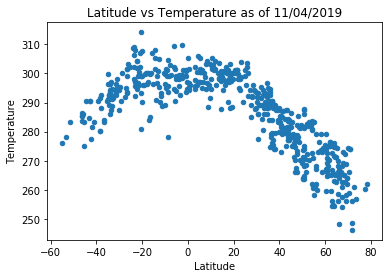

In [12]:
date = input("Insert today's date (mm/dd/yyyy): ")
temp_fig = clean_df.plot.scatter('coord.lat', 'main.temp_max')
plt.title(f"Latitude vs Temperature as of {date}")
temp_fig.set_xlabel("Latitude")
temp_fig.set_ylabel("Temperature")
plt.savefig('output_data/temp.png')

#### Latitude vs. Humidity Plot

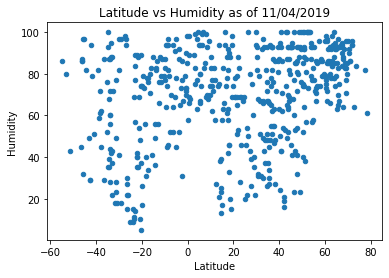

In [13]:
temp_fig = clean_df.plot.scatter('coord.lat', 'main.humidity')
plt.title(f"Latitude vs Humidity as of {date}")
temp_fig.set_xlabel("Latitude")
temp_fig.set_ylabel("Humidity")
plt.savefig('output_data/humid.png')

#### Latitude vs. Cloudiness Plot

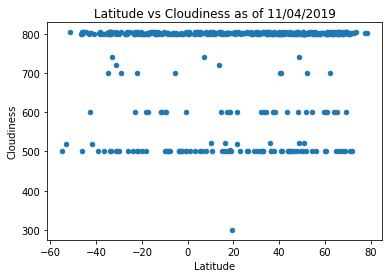

In [14]:
temp_fig = clean_df.plot.scatter('coord.lat', 'main_id')
plt.title(f"Latitude vs Cloudiness as of {date}")
temp_fig.set_xlabel("Latitude")
temp_fig.set_ylabel("Cloudiness")
plt.savefig('output_data/cloud.png')

#### Latitude vs. Wind Speed Plot

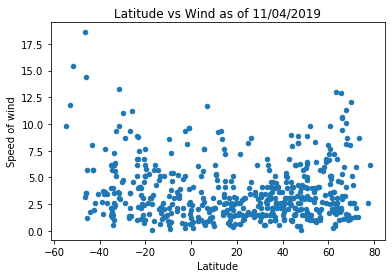

In [15]:
temp_fig = clean_df.plot.scatter('coord.lat', 'wind.speed')
plt.title(f"Latitude vs Wind as of {date}")
temp_fig.set_xlabel("Latitude")
temp_fig.set_ylabel("Speed of wind")
plt.savefig('output_data/wind.png')

In [16]:
df.to_html('output_data_table.html')